## Clustering items

Se dispone de un fichero csv llamado "item_features" en el cual se encuentra información de los ítems disponibles para compra en la web de H & M. En este fichero se tiene una fila por categoria de cada ítem. Una categoria puede ser un atributo cualquiera, el tipo de manga de una camiseta, si un pantalón es largo o corto, o el color de una sudadera. También se indica el valor de la categoria, que es el valor del atributo al que hace referencia la categoria. Por ejemplo, si la categoria es el color de la camiseta, el valor puede ser rojo. No tenemos forma de entender que es que, ya que se referencia ítem, categoria y valor por id. Para poder obtener información valiosa de los ítems en el posterior entrenamiento del modelo, vamos a tener que identificar que tipo de ítem es, para así poder agrupar los ítems por clusters. Esto se puede hacer mediante un proceso de aprendizaje no supervisado llamado clustering. Vamos a tratar de conseguir identificar que clusters existen y que ítems se encuentran en cada uno de ellos, solo a partir de los datos presentes en el fichero mencionado.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#purchases = pd.read_csv('/content/drive/MyDrive/Joan/train_purchases.csv')
#sessions = pd.read_csv('/content/drive/MyDrive/Joan/train_sessions.csv')
#features = pd.read_csv('/content/drive/MyDrive/Joan/item_features.csv')

purchases = pd.read_csv('train_purchases.csv')
sessions = pd.read_csv('train_sessions.csv')
features = pd.read_csv('item_features.csv')

In [4]:
features_ones = features.copy()
features_ones["feature_value_id"]=1
features_ones = features_ones.dropna()
features_ones = features_ones.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')
features_ones = features_ones.replace(np.nan, 0)
features_matrix = features.pivot_table(values='feature_value_id', index='item_id', columns='feature_category_id', aggfunc='first')

features_ones.head(10)

feature_category_id,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
item_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
9,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


Método de estandardización: restamos la media y escalamos a la varianza unitaria.

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
features_scaled=ss.fit_transform(features_ones)
features_scaled= pd.DataFrame(features_scaled)
features_scaled.head(20)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
1,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
2,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
3,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
4,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
5,-0.203153,-0.324182,1.242743,0.79255,1.223496,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,1.077770,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
6,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
7,-0.203153,-0.324182,-0.804672,-1.26175,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,-1.135140
8,-0.203153,-0.324182,-0.804672,0.79255,-0.817330,-0.286060,0.400516,-0.300490,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,-0.187789,-0.17073,0.394607,0.880948
9,-0.203153,-0.324182,-0.804672,-1.26175,1.223496,-0.286060,0.400516,3.327901,-0.076265,-0.226388,...,-0.17073,-0.927842,-0.196065,-0.348674,0.168358,0.398101,5.325118,-0.17073,0.394607,-1.135140


In [6]:
features_scaled = features_ones

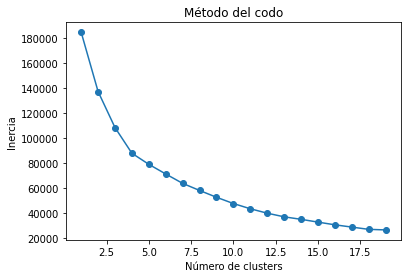

In [45]:
# Uso del metodo del codo para encontrar el número óptimo de clusters 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,20),wcss, marker="o")

plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.show()

Se puede ver un 'codo' con 4 clústeres, habrá que comprobar con un análisis de la silueta si es coherente escoger ese número.

In [8]:
features_series=pd.Series(features_scaled.index)

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def silhouette_analysis(df, cluster_labels,n,clustering_type,heading):
    
    plt.figure(figsize=(15,10))
    ax= plt.subplot()
    ax.set_ylim([0, len(df) + (n + 1) * 50])
    dictofhobbies={i:cluster_labels[i] for i in range(0,len(cluster_labels))}
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    if clustering_type == 'Kmeans':
        metrics='euclidean'
    if clustering_type == 'Agglomerative':
        metrics='euclidean'
    if clustering_type == 'GaussianMixture':
        metrics='mahalanobis'
    silhouette_avg = silhouette_score(df, cluster_labels,metric=metrics)
    
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    
   
    yticks=[]
    ylabels=[]
    y_lower = 10
    for i in range(n):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        silhouette_labels=[hobby for hobby,cluster_label in dictofhobbies.items() if cluster_label==i ]
        zipped_values=dict(zip(silhouette_labels,ith_cluster_silhouette_values))      
        #sorted(zipped_values,key=lambda x:x1])
        new_zipped_values=sorted(zipped_values.items(), key=lambda x: x[1])
        ith_cluster_silhouette_values.sort()
        #print("ith_cluster_silhouette_values::",len(ith_cluster_silhouette_values))
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        #print("yupper is::",y_upper)
        color = cm.nipy_spectral(float(i) / n)
        pos=np.arange(y_lower, y_upper)
       
        ax.barh(pos,ith_cluster_silhouette_values,height=1.0,color=color, edgecolor="none")
               
        yticks.extend(pos)
        ylabels.extend(labels[0] for labels in new_zipped_values)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
       
        # Compute the new y_lower for next plot
        y_lower = y_upper + 50  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Clusters")
    
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    hobbies_labels=[]
    for y in ylabels:
        hobbies_labels.append(features_series[y])
    
    #ax.set_yticks(yticks)
    #ax.set_yticklabels(hobbies_labels, fontSize=8)  
    ax.set_xticks([-0.1, 0,0.1, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for " ,heading, "with n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')

plt.show()

Tras el análisis que hemos llevado a cabo de que número de componentes es necesario, probamos a obtener los valores de los average silhouette score para cada número de clusters del 2 al 10. 

PCA for components=16
For n_clusters = 2 The average silhouette_score is : 0.2774074165116728
For n_clusters = 3 The average silhouette_score is : 0.33385861821565926
For n_clusters = 4 The average silhouette_score is : 0.37921719938868503
For n_clusters = 5 The average silhouette_score is : 0.3645453605042064
For n_clusters = 6 The average silhouette_score is : 0.3737898580650503
For n_clusters = 7 The average silhouette_score is : 0.4216666594374856
For n_clusters = 8 The average silhouette_score is : 0.43513911526520743
For n_clusters = 9 The average silhouette_score is : 0.46372734371655


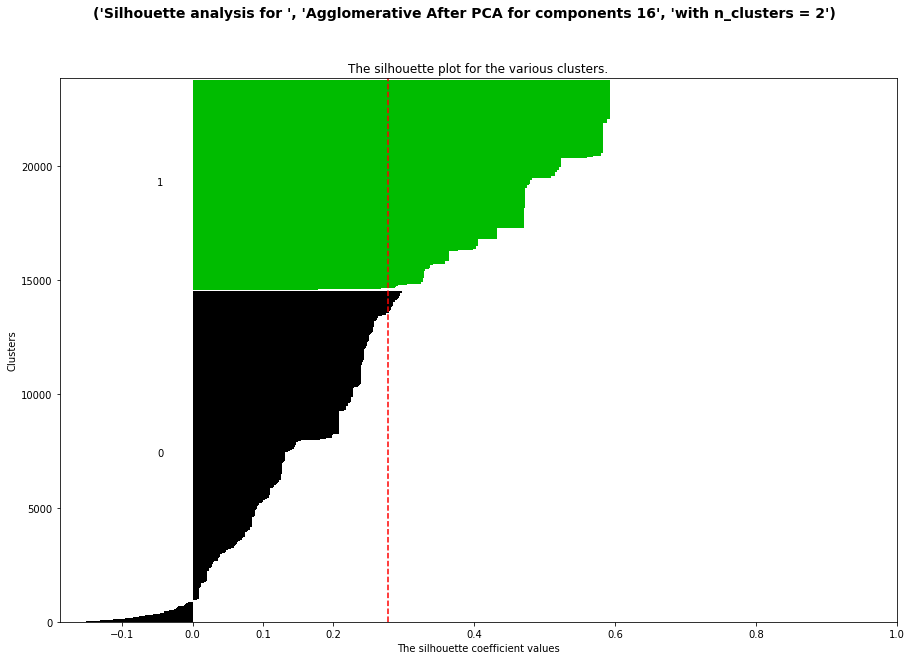

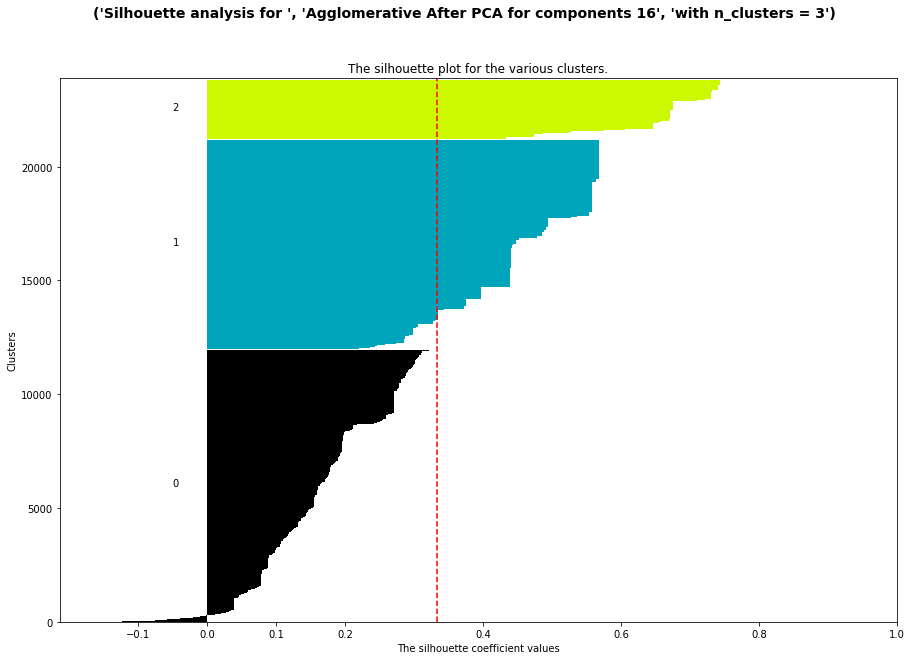

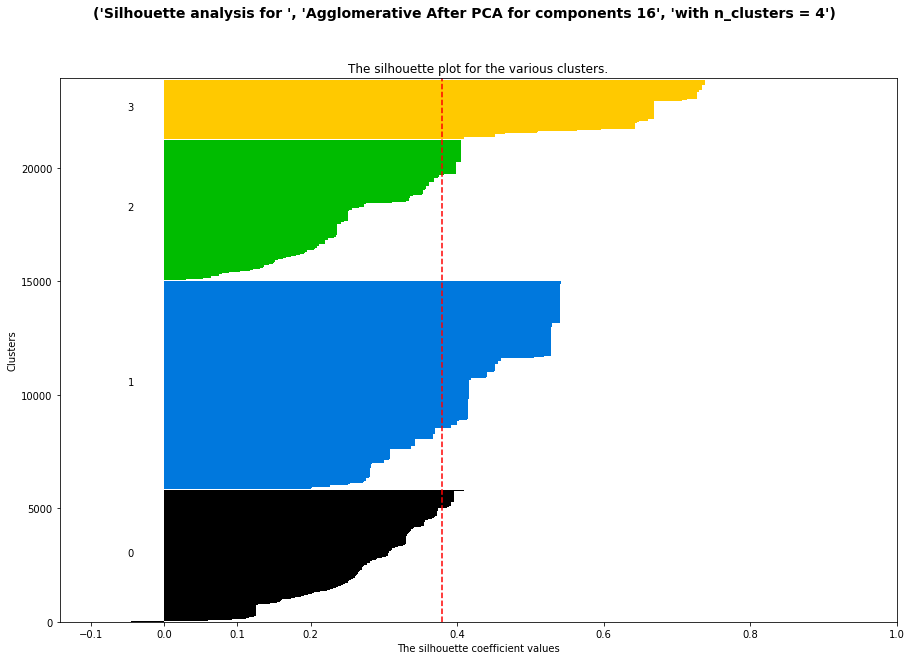

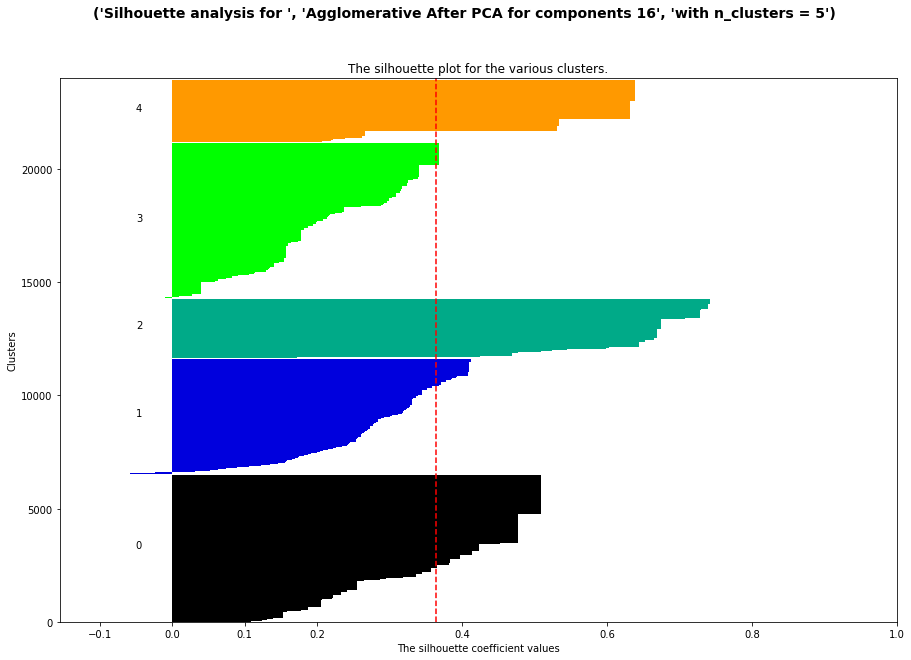

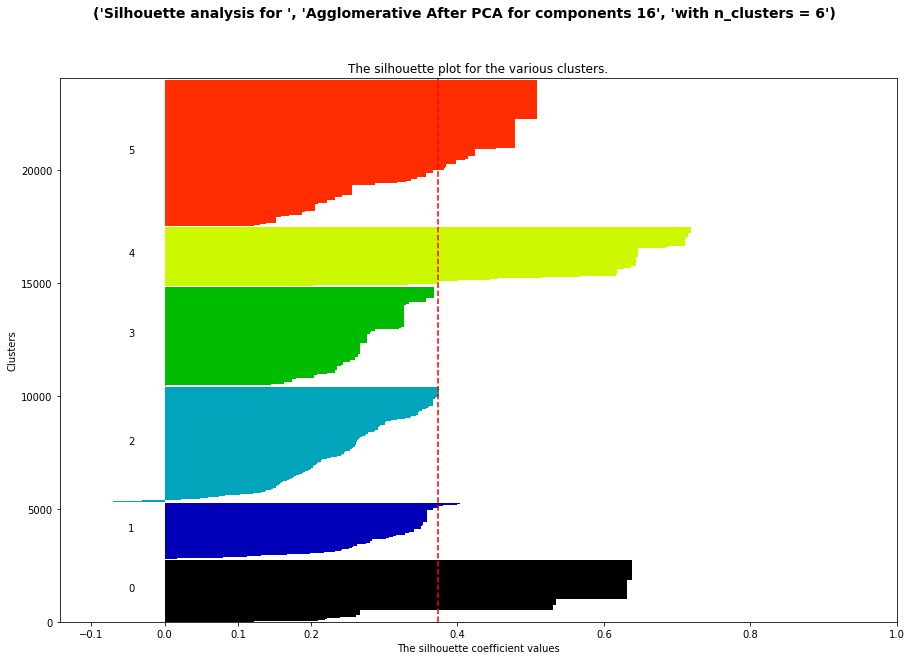

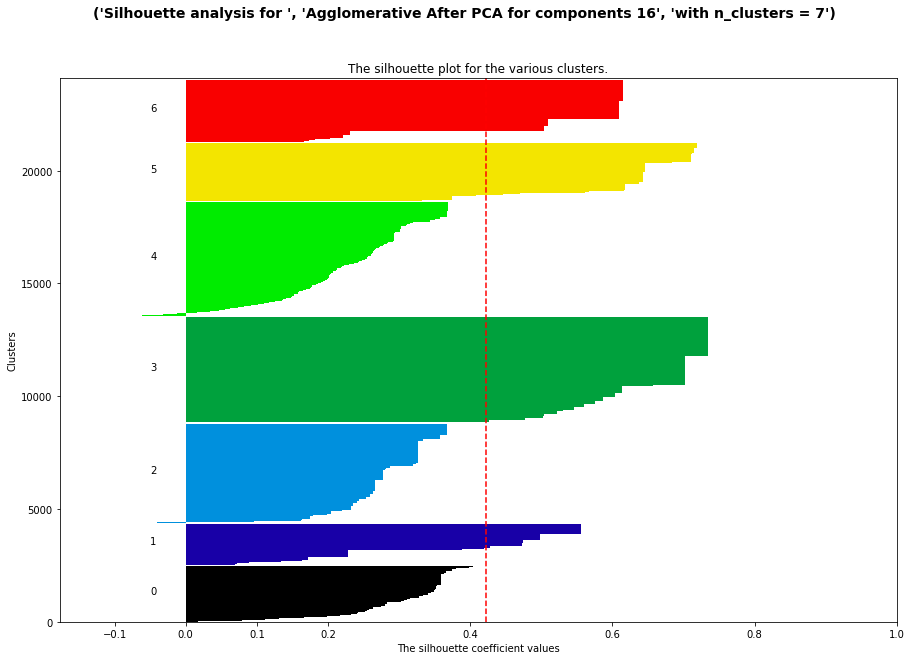

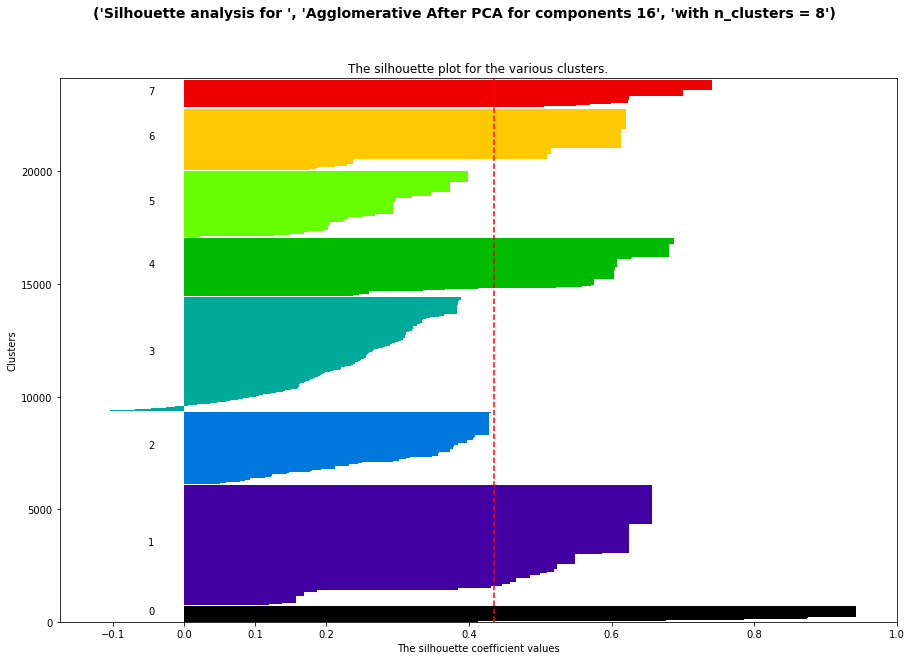

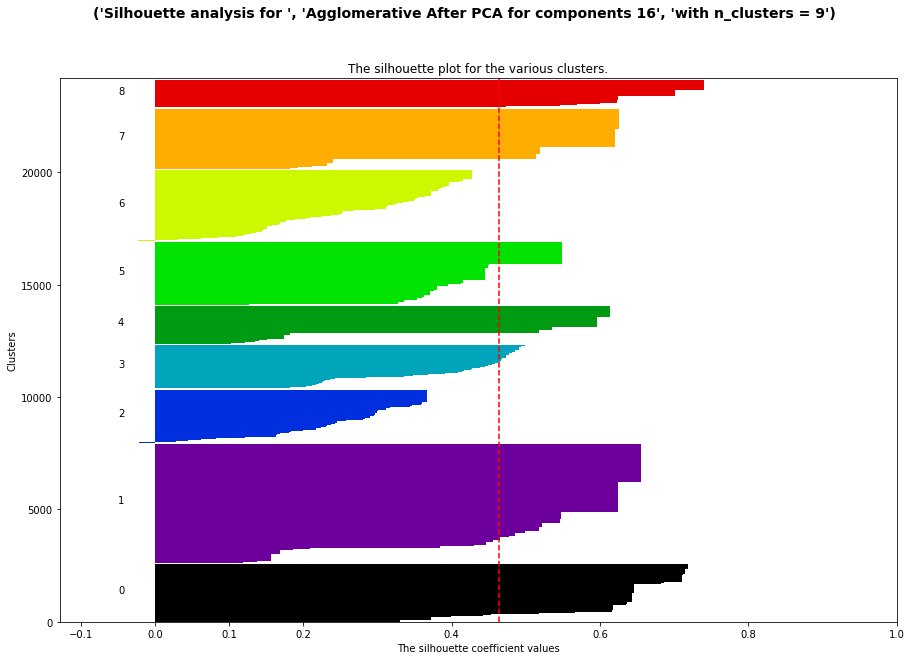

In [42]:
#running PCA with kmeans 

from sklearn.decomposition import PCA

for n_comp in [16]:
    print("PCA for components=%d"%n_comp)
    pca_km=PCA(n_components=n_comp)
    df_reduced=pca_km.fit_transform(features_scaled)
    
    
    for n_clust in range(2,10):
        kmeans_red_pca=KMeans(n_clusters=n_clust)
        reduced_cluster_labels=kmeans_red_pca.fit_predict(df_reduced)
        centers_km=kmeans_red_pca.cluster_centers_
        silhouette_analysis(df_reduced,reduced_cluster_labels,n_clust,'Agglomerative','Agglomerative After PCA for components %d' %n_comp)

In [117]:
def visualize_clusters(to_plot,n_clusters,method,centers = []):
    
    plt.figure(figsize=(15,8))
    ax=plt.subplot()

    colors=['red','green','blue','orange','yellow','purple']

    for n_clusters in range(n_clusters):
        
        #colors = cm.nipy_spectral((to_plot['Cluster_pred']== n_clusters).astype(float) / n_clusters)
        #colors=['red','green','blue','orange','yellow','purple']
        
        ax.scatter(to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 1],to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 2],
                   marker='.', s=80, lw=0, alpha=0.7,
                    c=colors[n_clusters], edgecolor='black', label='Cluster %d'%n_clusters)

            
            # Draw white circles at cluster centers
    for i, c in enumerate(centers):

        ax.scatter(c[0], c[1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=80, edgecolor='k')
                                
    ax.set_title("The visualization of the clustered data using the " + method + " method.")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")

    plt.legend()    
    plt.show()


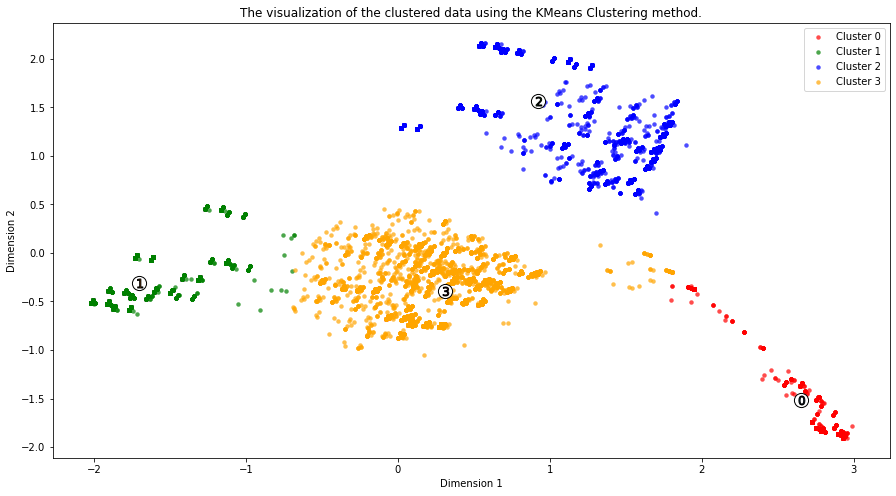

In [241]:
#KMEANS

#visualizing the 5 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(features_scaled)

# running Kmeans for 5 clusters on 2 PC's
kmeans_pca_2comp=KMeans(n_clusters=4)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

visualize_clusters(to_plot,4,"KMeans Clustering",centers_2comp)

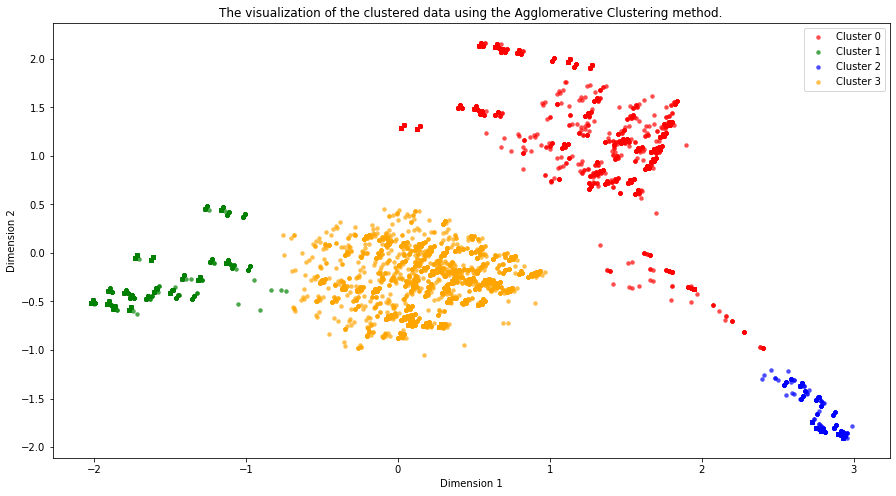

In [252]:
#AgglomerativeClustering

#visualizing the 5 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(features_scaled)

# running Kmeans for 5 clusters on 2 PC's
kmeans_pca_2comp=AgglomerativeClustering(n_clusters=4)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
#centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

visualize_clusters(to_plot,4,"Agglomerative Clustering")

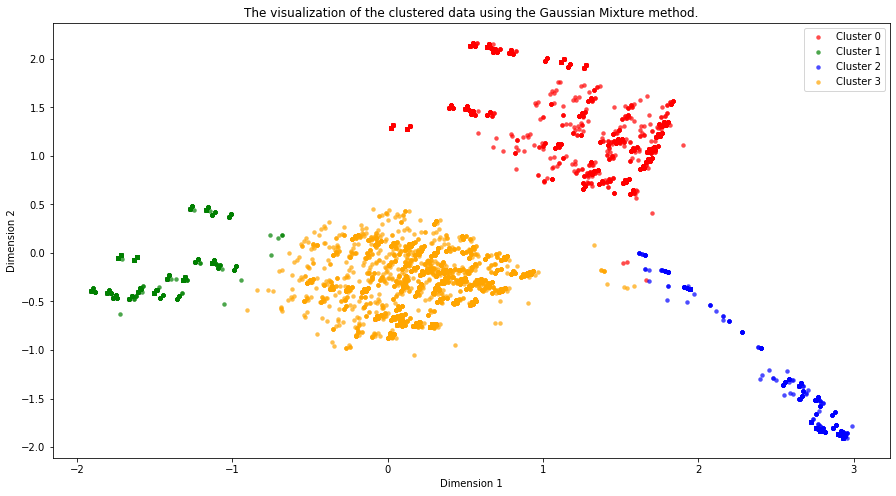

In [263]:
#GMixture

#visualizing the 5 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(features_scaled)

# running Kmeans for 5 clusters on 2 PC's
kmeans_pca_2comp=GaussianMixture(n_components=5)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
#centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

visualize_clusters(to_plot,4,"Gaussian Mixture")

In [266]:
print(predictions)

       Cluster_pred
0                 0
1                 4
2                 1
3                 3
4                 4
...             ...
23686             1
23687             2
23688             1
23689             3
23690             3

[23691 rows x 1 columns]


In [249]:
cluster_assign = predictions.loc[to_plot.index,'Cluster_pred']
cluster_assign= cluster_assign.to_frame()

cluster_assign["item_id2"]=np.unique(features[['item_id']].values).tolist()
#print(np.unique(features[['item_id']].values).tolist())
cluster_assign.head()
cluster_assign.to_csv('cluster_assign.csv')